<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/12-Image%20and%20Video%20Analytics/OpenCV/Add_watermark_on_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
from google.colab.patches import cv2_imshow
#cv2_imshow(image)

In [2]:
!wget https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/Images/diego-jimenez-A-NVHPka9Rk-unsplash.jpg
!wget https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/Images/andy-kelly-0E_vhMVqL9g-unsplash.jpg
!wget https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/Images/Watermark.jpg

--2021-08-18 17:05:19--  https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/Images/diego-jimenez-A-NVHPka9Rk-unsplash.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4032603 (3.8M) [image/jpeg]
Saving to: ‘diego-jimenez-A-NVHPka9Rk-unsplash.jpg’

diego-jimenez-A-NVH 100%[===================>]   3.85M  --.-KB/s    in 0.02s   

2021-08-18 17:05:19 (189 MB/s) - ‘diego-jimenez-A-NVHPka9Rk-unsplash.jpg’ saved [4032603/4032603]

--2021-08-18 17:05:19--  https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/Images/andy-kelly-0E_vhMVqL9g-unsplash.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuserconte

Step-1: To import and load the required libraries.


In [9]:
img = cv2.imread('diego-jimenez-A-NVHPka9Rk-unsplash.jpg')
watermark = cv2.imread("Watermark.jpg")

Step-2: To Scale the images 

You can scale the images and hence downsize an image for a particular resolution or keep the image to its original resolution when required.



In [10]:
percent_of_scaling = 20
new_width = int(img.shape[1] * percent_of_scaling/100)
new_height = int(img.shape[0] * percent_of_scaling/100)
new_dim = (new_width, new_height)
resized_img = cv2.resize(img, new_dim, interpolation=cv2.INTER_AREA)

wm_scale = 40
wm_width = int(watermark.shape[1] * wm_scale/100)
wm_height = int(watermark.shape[0] * wm_scale/100)
wm_dim = (wm_width, wm_height)

Step-3: Writing the code to create a watermark


In [11]:
resized_wm = cv2.resize(watermark, wm_dim, interpolation=cv2.INTER_AREA)

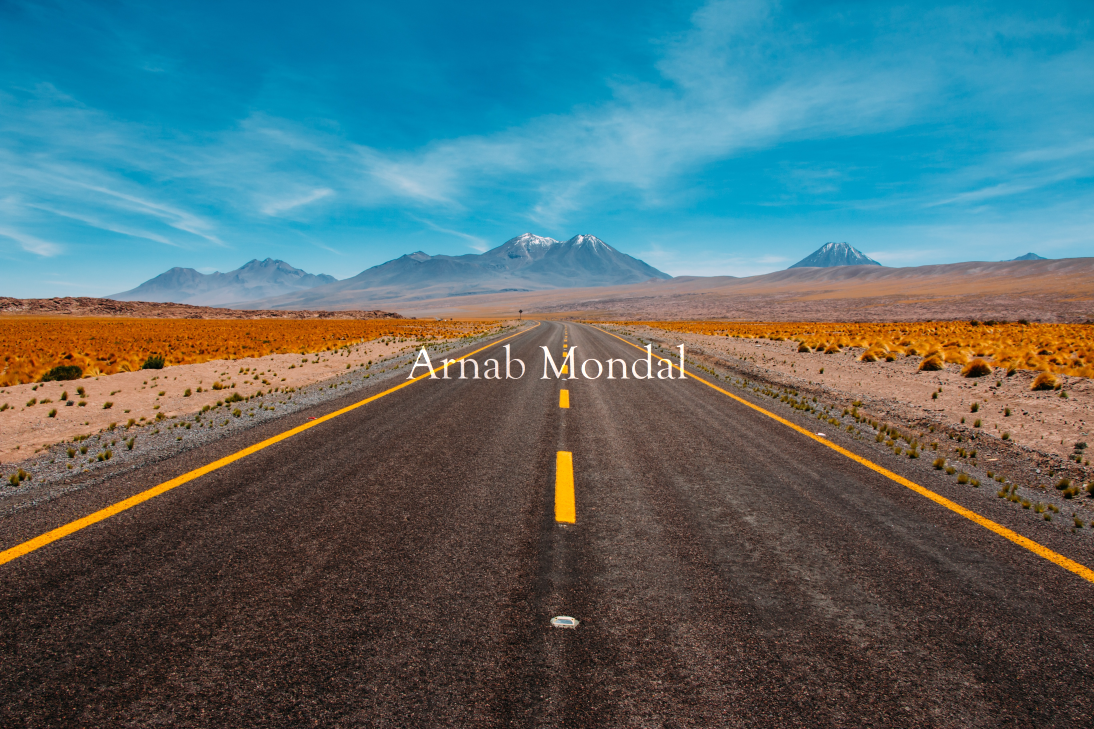

In [13]:
h_img, w_img, _ = resized_img.shape
center_y = int(h_img/2)
center_x = int(w_img/2)
h_wm, w_wm, _ = resized_wm.shape
top_y = center_y - int(h_wm/2)
left_x = center_x - int(w_wm/2)
bottom_y = top_y + h_wm
right_x = left_x + w_wm

roi = resized_img[top_y:bottom_y, left_x:right_x]
result = cv2.addWeighted(roi, 1, resized_wm, 0.3, 0)
resized_img[top_y:bottom_y, left_x:right_x] = result

filename = 'Watermakred_Image.jpg'
cv2.imwrite(filename, resized_img)
cv2_imshow(resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()